In [ ]:
from google.colab import drive, files
drive.mount('/content/drive/')

Mounted at /content/drive/


# Explore all the necessary libraries

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import warnings
warnings.filterwarnings("ignore")
from numpy import sqrt 
from sklearn.metrics import r2_score


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project phase/Sales_project_phaseII.csv')

In [ ]:
df.head()

,Unnamed: 0,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
0,0,0,Namibia,0,0,2,3604,668.27,502.54,2408445.08,1811154.16,597290.92,2015,8,31,2015,10,12
1,1,1,Iceland,11,1,3,8435,255.28,159.42,2153286.80,1344707.70,808579.10,2010,11,20,2011,1,9
2,2,1,Russia,1,1,1,4848,421.89,364.69,2045322.72,1768017.12,277305.60,2017,6,22,2017,6,25
3,3,1,Moldova,1,1,1,7225,421.89,364.69,3048155.25,2634885.25,413270.00,2012,2,28,2012,3,20
4,4,1,Malta,9,1,2,1975,205.70,117.11,406257.50,231292.25,174965.25,2010,8,12,2010,9,13


In [ ]:
df.drop('Unnamed: 0',axis = 1,inplace = True)

In [ ]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
0,0,Namibia,0,0,2,3604,668.27,502.54,2408445.08,1811154.16,597290.92,2015,8,31,2015,10,12
1,1,Iceland,11,1,3,8435,255.28,159.42,2153286.80,1344707.70,808579.10,2010,11,20,2011,1,9
2,1,Russia,1,1,1,4848,421.89,364.69,2045322.72,1768017.12,277305.60,2017,6,22,2017,6,25
3,1,Moldova,1,1,1,7225,421.89,364.69,3048155.25,2634885.25,413270.00,2012,2,28,2012,3,20
4,1,Malta,9,1,2,1975,205.70,117.11,406257.50,231292.25,174965.25,2010,8,12,2010,9,13


In [ ]:
df.shape

(43426, 17)

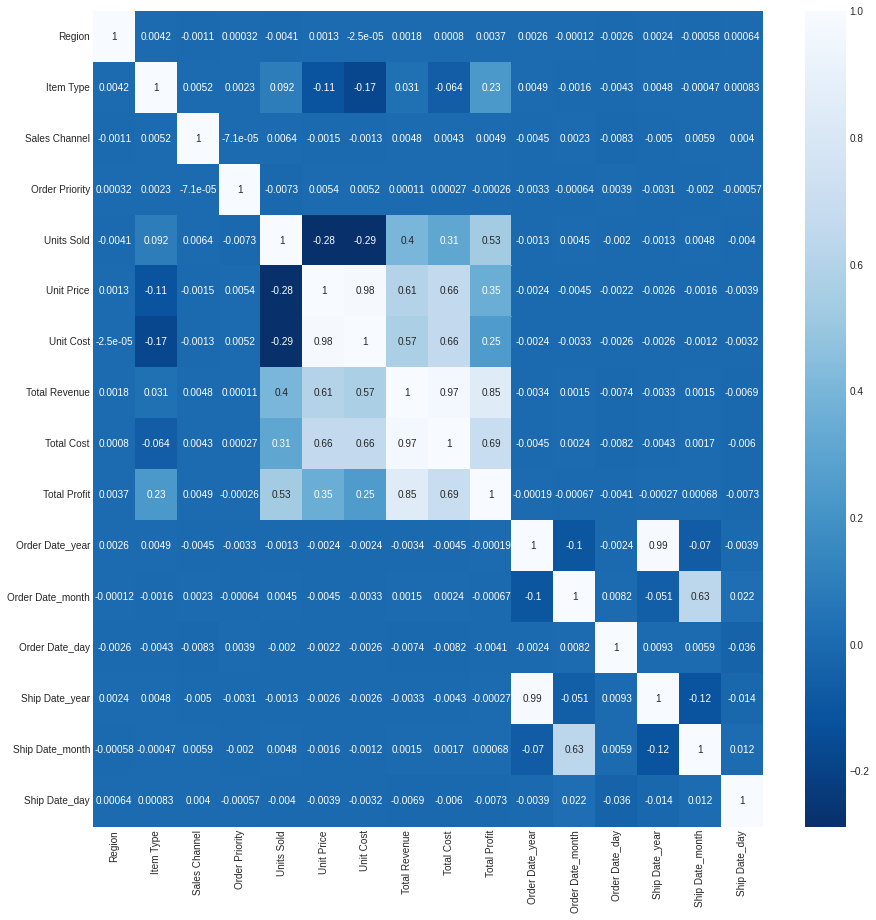

In [ ]:
plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), cmap = 'Blues_r',annot = True)

# Splitting the dataset

After peforming the **Data Analysis**, **Data Cleaning**, **Data Preprocessing** on our dataset, it's time to finally split the dataset into train and test dataset.
We'll use sklearn train_test_split and split our dataset into 70:30 ratio for train and test respectively.

In [ ]:
x = df.drop('Total Profit',axis = 1)
y = pd.DataFrame()
y = df['Total Profit']

In [ ]:
x.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
0,0,Namibia,0,0,2,3604,668.27,502.54,2408445.08,1811154.16,2015,8,31,2015,10,12
1,1,Iceland,11,1,3,8435,255.28,159.42,2153286.80,1344707.70,2010,11,20,2011,1,9
2,1,Russia,1,1,1,4848,421.89,364.69,2045322.72,1768017.12,2017,6,22,2017,6,25
3,1,Moldova,1,1,1,7225,421.89,364.69,3048155.25,2634885.25,2012,2,28,2012,3,20
4,1,Malta,9,1,2,1975,205.70,117.11,406257.50,231292.25,2010,8,12,2010,9,13


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [ ]:
x_train.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
37319,5,Papua New Guinea,11,1,4,626,255.28,159.42,159805.28,99796.92,2015,7,13,2015,8,30
40787,0,Tanzania,2,0,4,6139,9.33,6.92,57276.87,42481.88,2015,1,29,2015,3,14
24534,1,Liechtenstein,4,1,1,5946,154.06,90.93,916040.76,540669.78,2013,3,11,2013,4,3
1944,1,Vatican City,0,1,2,3637,668.27,502.54,2430497.99,1827737.98,2017,4,4,2017,5,20
17244,2,Malaysia,5,1,4,5410,81.73,56.67,442159.30,306584.70,2015,8,16,2015,9,27


In [ ]:
x_test.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
16413,0,Benin,11,1,1,1361,255.28,159.42,347436.08,216970.62,2014,10,17,2014,11,27
21366,4,Honduras,2,0,3,219,9.33,6.92,2043.27,1515.48,2012,4,28,2012,5,5
30446,0,Central African Republic,3,0,2,3739,437.20,263.33,1634690.80,984590.87,2013,11,3,2013,11,25
32051,1,Czech Republic,3,0,1,3928,437.20,263.33,1717321.60,1034360.24,2017,5,27,2017,6,27
4277,2,Bhutan,7,0,1,544,152.58,97.44,83003.52,53007.36,2010,12,12,2010,12,30


#### Perform label encoding of text and categorical data.
1. We perform this step after splitting of data to prevent data leakage. 
2. Data leakage will introduce biasness in our model and we'll get absurd results when we perform prediction on unseen data

In [ ]:
# Import label encoder 
from sklearn import preprocessing   
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()   
# Encode labels in column 'Country'. 
x_train['Country']= label_encoder.fit_transform(x_train['Country'])
x_test['Country']= label_encoder.transform(x_test['Country'])

We'll perform **MinMaxScaling** on the numerical data by using MinMaxScaler by scikit learn. 
This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.
 
The transformation is given by:

    X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
    X_scaled = X_std * (max - min) + min

where min, max = feature_range.

This is done so that no feature dominates the other hence preventing bias in the model. 



In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
x_train[['Region','Country','Item Type','Sales Channel','Order Priority','Total Revenue','Total Cost']] = scaler.fit_transform(x_train[['Region','Country','Item Type','Sales Channel','Order Priority','Total Revenue','Total Cost']])
x_test[['Region','Country','Item Type','Sales Channel','Order Priority','Total Revenue','Total Cost']] = scaler.transform(x_test[['Region','Country','Item Type','Sales Channel','Order Priority','Total Revenue','Total Cost']])


In [ ]:
x_train[['Units Sold','Unit Price','Unit Cost']] = scaler.fit_transform(x_train[['Units Sold','Unit Price','Unit Cost']])
x_test[['Units Sold','Unit Price','Unit Cost']] = scaler.transform(x_test[['Units Sold','Unit Price','Unit Cost']])

In [ ]:
x_train[['Order Date_year','Order Date_month','Order Date_day','Ship Date_year','Ship Date_month','Ship Date_day']] = scaler.fit_transform(x_train[['Order Date_year','Order Date_month','Order Date_day','Ship Date_year','Ship Date_month','Ship Date_day']])
x_test[['Order Date_year','Order Date_month','Order Date_day','Ship Date_year','Ship Date_month','Ship Date_day']] = scaler.transform(x_test[['Order Date_year','Order Date_month','Order Date_day','Ship Date_year','Ship Date_month','Ship Date_day']])

In [ ]:
x_train.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
37319,0.833333,0.679348,1.000000,1.0,1.000000,0.062506,0.373251,0.294379,0.051061,0.036887,0.714286,0.545455,0.400000,0.714286,0.636364,0.966667
40787,0.000000,0.880435,0.181818,0.0,1.000000,0.613861,0.000000,0.000000,0.018295,0.015698,0.714286,0.000000,0.933333,0.714286,0.181818,0.433333
24534,0.166667,0.489130,0.363636,1.0,0.000000,0.594559,0.219641,0.162169,0.292737,0.199879,0.428571,0.181818,0.333333,0.428571,0.272727,0.066667
1944,0.166667,0.978261,0.000000,1.0,0.333333,0.363636,1.000000,0.956721,0.776724,0.675710,1.000000,0.272727,0.100000,1.000000,0.363636,0.633333
17244,0.333333,0.521739,0.454545,1.0,1.000000,0.540954,0.109873,0.096035,0.141295,0.113337,0.714286,0.636364,0.500000,0.714286,0.727273,0.866667


In [ ]:
x_test.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
16413,0.000000,0.086957,1.000000,1.0,0.000000,0.136014,0.373251,0.294379,0.111024,0.080207,0.571429,0.818182,0.533333,0.571429,0.909091,0.866667
21366,0.666667,0.353261,0.181818,0.0,0.666667,0.021802,0.000000,0.000000,0.000644,0.000553,0.285714,0.272727,0.900000,0.285714,0.363636,0.133333
30446,0.000000,0.152174,0.272727,0.0,0.333333,0.373837,0.649331,0.494962,0.522402,0.363997,0.428571,0.909091,0.066667,0.428571,0.909091,0.800000
32051,0.166667,0.201087,0.272727,0.0,0.000000,0.392739,0.649331,0.494962,0.548809,0.382397,1.000000,0.363636,0.866667,1.000000,0.454545,0.866667
4277,0.333333,0.092391,0.636364,0.0,0.000000,0.054305,0.217395,0.174736,0.026517,0.019589,0.000000,1.000000,0.366667,0.000000,1.000000,0.966667


# Machine Learning Models

##Hyperparameter Tuning 
**Hyperparameter**- Model configuration argument specified by the developer to guide the learning process for a specific dataset

The process where we objectively search different values for model hyperparameters and choose a subset that results in a model that achieves the best performance on a given dataset is called hyperparameter optimization or hyperparameter tuning and is available in the scikit-learn Python machine learning library. 

The result of a hyperparameter optimization is a single set of well-performing hyperparameters that you can use to configure your model.

### Random Search Hyperparameter tuning technique
It checks a randomly selected fixed number of combinations specified in **n_iter** of the **RandomizedSearchCV** function. 

Random search has a very high probability of finding the optimal hyperparameter combination within the randomly selected combinations. 

This method is very useful to find the optimal hyperparameter combination quickly and efficiently when the search space is higher dimensional and contains many combinations of values.


## 1. Support Vector Regressors
The first model which we're going to appply is SVR. 
SVR are really powerful algorithms. The speciality of SVR is its **Kernel Trick**
The two most common typ of kernels are 
* Polynomial Kernels
Polynomial kernel is a kernel function that represents the similarity of vectors (training samples) in a different feature space over polynomials of the original variables, allowing learning of non-linear models.

* RBF Kernels
RBF kernels are the most generalized form of kernelization and is one of the most widely used kernels due to its similarity to the Gaussian distribution. The RBF kernel function for two points X1 and X2 computes the similarity or how close they are to each other. 
Mathematically,
 **K(X1,X2) = exp(-||X1-X2||^2 / 2σ^2 )** 


### 1.1 RandomSearchCV on SVR
The hyperparameters in SVR that need to be tuned are
* kernel - This specifies the type of kernel we should use with our problem. Here, we'll use three kernels 
     1. Linear
     2. Polynomial
     3. RBF
* degree - This parameter is used only if we're using polynomial kernel. This refers to what degree of polynomial we should use.
* epsilon - This refers to the amount of error we can tolerate while getting the optimal hyperplane.
* C - This is our regularization parameter. We use regularization parameter to make our model fit the data better and make less mistakes.


In [ ]:
#which kernel to choose
kernel = ['linear', 'poly', 'rbf']

#degree if kernel is polynomial
degree = [3,4,2,5,6]

#epsilon - how much error can be tolerated
epsilon = [float(x) for x in np.linspace(0, 1, 5)]

# C - Regularization parameter
C = [float(x) for x in np.linspace(1.0, 3.0, 5)]

# Create the grid
dt_grid = {'kernel': kernel,
           'degree': degree,
           'epsilon': epsilon,
           'C' : C}

In [ ]:
dt_grid

{'C': [1.0, 1.5, 2.0, 2.5, 3.0],
 'degree': [3, 4, 2, 5, 6],
 'epsilon': [0.0, 0.25, 0.5, 0.75, 1.0],
 'kernel': ['linear', 'poly', 'rbf']}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm

# Create the model to be tuned
dt_base = svm.SVR()

# Create the random search SVR
dt_random = RandomizedSearchCV(estimator = dt_base, param_distributions = dt_grid, 
                               n_iter = 5, cv = 5)

# Fit the random search model
dt_random.fit(x_train, y_train)

# View the best parameters from the random search
dt_random.best_params_

{'C': 2.5, 'degree': 4, 'epsilon': 0.25, 'kernel': 'poly'}

The output of above code gives the best hyperparameter values that should be used if one wants high accuracy.

In [ ]:
svr = svm.SVR(C =  3.0, degree = 6, epsilon = 0.5, kernel = 'poly')
svr.fit(x_train,y_train)
print('r2_score on train data :',svr.score(x_train,y_train))

r2_score on train data : 0.5769483992618968


In [ ]:
pred_svm = svr.predict(x_test)
r2_score(y_test, pred_svm)

0.5912766373833563

SVR have an r2_score of 0.61 on train data and 0.599 score on test data.

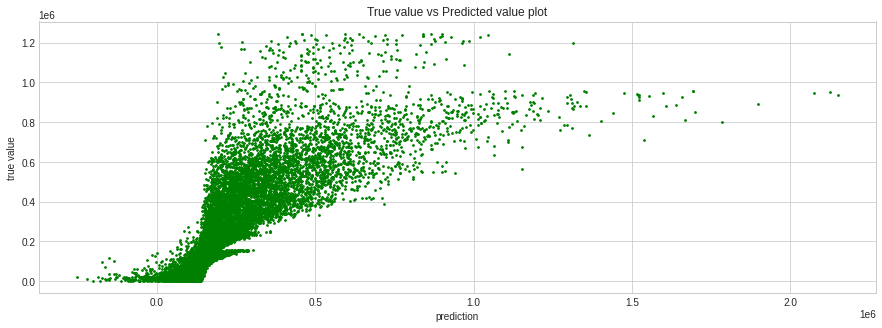

In [ ]:
plt.figure(figsize=(15, 5))
plt.scatter(pred_svm,y_test, c ="green" , s = 3) 
plt.xlabel("prediction") 
plt.ylabel("true value") 

plt.title('True value vs Predicted value plot')
ax = plt.axes()
#ax.set_facecolor("black")

plt.show()

The above **scatter plot** of *predicted* vs *true* value is not straight line as we can see.

## 2. K Nearest Neighbours Regressor

### 2.1 Hyperparameter Tuning using Random Search For KNN

The hyperparameters for KNN to be tuned are
* weights - This refers to how should the neighbours of a particular data point be treated. The possible values are
        1. 'uniform' : uniform weights. All points in each neighborhood are weighted equally.

        2. 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
* algorithm - Algorithm used to compute the nearest neighbors
        1. auto - will use most appropriate algorithm based on values passed to *fit* method.
        2. kd_tree - kd_tree will be used.
* n_neighbors - Number of neighbours to consider.
* p - Power parameter for the Minkowski metric.
        1. p = 1 - Manhattan_distance (l1)
        2. p = 2 - Euclidean_distance (l2) 
* leaf_size - Leaf size for KDTree. Can affect the speed of the construction and query, as well as the memory required to store the tree. 

In [ ]:
#which weight metric to choose
weights = ['uniform', 'distance']

#degree if kernel is polynomial
algorithm = ['auto', 'kd_tree']


n_neighbors = [3,5,7,1]

#p value
p = [1,2]

# leaf size 
leaf_size = [30,40,20,45]

# Create the grid
dt_grid = {'weights': weights,
           'algorithm': algorithm,
           'n_neighbors': n_neighbors,
           'p' : p,
           'leaf_size' : leaf_size}

In [ ]:
dt_grid

{'algorithm': ['auto', 'kd_tree'],
 'leaf_size': [30, 40, 20, 45],
 'n_neighbors': [3, 5, 7, 1],
 'p': [1, 2],
 'weights': ['uniform', 'distance']}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Create the model to be tuned
dt_base = KNeighborsRegressor()

# Create the random search SVR
dt_random = RandomizedSearchCV(estimator = dt_base, param_distributions = dt_grid, 
                               n_iter = 10, cv = 5)

# Fit the random search model
dt_random.fit(x_train, y_train)

# View the best parameters from the random search
dt_random.best_params_

{'algorithm': 'auto',
 'leaf_size': 40,
 'n_neighbors': 5,
 'p': 1,
 'weights': 'distance'}

The output of above code gives the best hyperparameter values that should be used if one wants high accuracy.

In [ ]:
knr = KNeighborsRegressor(algorithm = 'auto', leaf_size = 40,n_neighbors = 7, p = 1,weights = 'distance')
knr.fit(x_train,y_train)

KNeighborsRegressor(leaf_size=40, n_neighbors=7, p=1, weights='distance')

In [ ]:
print('r2 score on train data', knr.score(x_train,y_train))

r2 score on train data 1.0


In [ ]:
pred_knn = dt_random.predict(x_test)
print('r2 score on test data',r2_score(y_test, pred_knn))

r2 score on test data 0.9423488685350148


The above r2 score of **1** shows us that KNN regressors are able to fit the train data perfectly well but high difference between score of train and test shows that they're not able to generalize well on unseen data.

**Conclusion** - Model overfits and we need to find a better model.



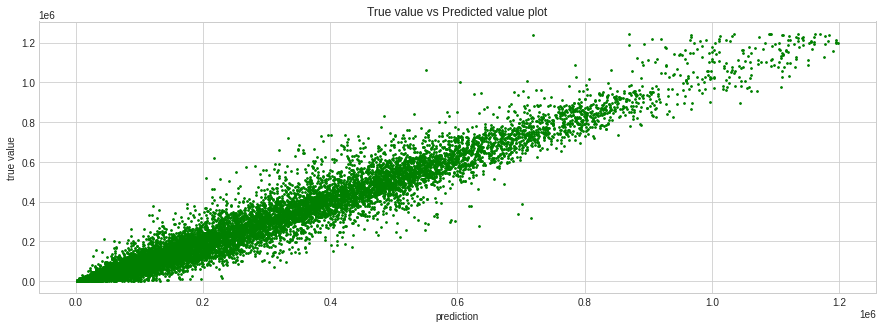

In [ ]:
plt.figure(figsize=(15, 5))
plt.scatter(pred_knn,y_test, c ="green" , s = 3) 
plt.xlabel("prediction") 
plt.ylabel("true value") 

plt.title('True value vs Predicted value plot')
ax = plt.axes()

plt.show()

The above **scatter plot** of *predicted* vs *true* value is almost a straight line but needs to be improved.

## Ensemble Learning Techniques

Ensemble is the art of combining diverse set of learners (individual models) together to improvise on the stability and predictive power of the model. In the above example, the way we combine all the predictions together will be termed as Ensemble Learning.

## 3. Random Forest Regressor

### Bagging
Bagging tries to implement similar learners on small sample populations and then takes a mean of all the predictions. In generalized bagging, you can use different learners on different population.  As you can expect this helps us to reduce the variance error.

**Takes low bias and high variance model -> returns low bias and low variance models** 

A random forest is a meta estimator that fits a number of decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

### 3.1 Hyperparameter Tuning

1. **max_depth**
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

2. **criterion**
The function to measure the quality of a split.

3. **n_estimators**
number of estimators which we use to train the model.

4. **max_features**
number of features which we have to consider

In [ ]:

#which weight metric to choose
max_depth = [5,10,4,3]

#degree if kernel is polynomial
criterion = ['mae']


n_estimators = [100, 90, 150, 200]

max_features = ['sqrt', 'log2']

# Create the grid
dt_grid = {'max_depth': max_depth,
           'max_features' : max_features,
           'n_estimators': n_estimators}

In [ ]:
dt_grid

{'max_depth': [5, 10, 4, 3],
 'max_features': ['sqrt', 'log2'],
 'n_estimators': [100, 90, 150, 200]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Create the model to be tuned
dt_base = RandomForestRegressor(verbose=1,n_jobs=-1)

# Create the random search SVR
dt_random = RandomizedSearchCV(estimator = dt_base, param_distributions = dt_grid, 
                               n_iter = 5, cv = 10)

# Fit the random search model
dt_random.fit(x_train, y_train)

# View the best parameters from the random search
dt_random.best_params_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    3.5s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    2.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    2.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent work

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}

In [ ]:
print(dt_random.best_params_)

{'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 10}


In [ ]:
print(dt_random.best_score_)

0.9993162187281606


In [ ]:
clf = RandomForestRegressor(n_estimators = 100, max_features =  'log2', max_depth =  10)
clf.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, max_features='log2')

In [ ]:
acc = clf.score(x_train,y_train)

print("Train R2score" ,acc)

Train R2score 0.9994895634128046


In [ ]:
pred_rf = clf.predict(x_test)
print("Test r2score: " , r2_score(y_test, pred_rf))

Test r2score:  0.9993123001723877


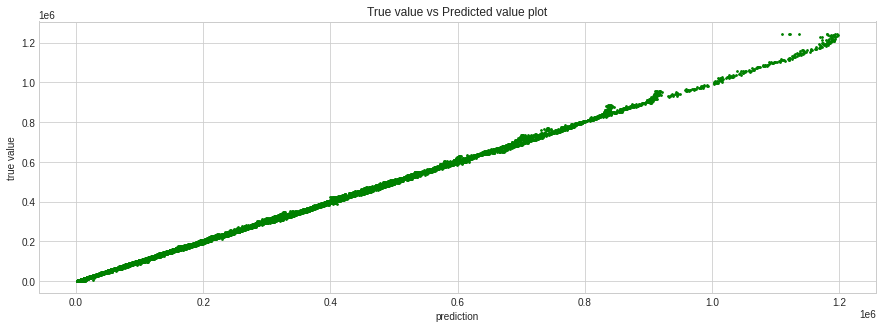

In [ ]:
plt.figure(figsize=(15, 5))
plt.scatter(pred_rf,y_test, c ="green" , s = 3) 
plt.xlabel("prediction") 
plt.ylabel("true value") 

plt.title('True value vs Predicted value plot')
ax = plt.axes()
#ax.set_facecolor("black")

plt.show()

### 3.2 Feature Interpretation

In [ ]:
rf_imp = clf.feature_importances_
print(rf_imp)

[1.00752903e-04 3.35085775e-04 6.26565903e-02 3.46562200e-05
 9.00451113e-05 1.40393857e-01 1.06073310e-01 1.01425019e-01
 3.74735829e-01 2.13134885e-01 1.14848695e-04 1.38638581e-04
 2.56644290e-04 1.26144754e-04 1.34716378e-04 2.48977117e-04]


In [ ]:
col = x_train.columns

In [ ]:
i = list(range(0,16))
i

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

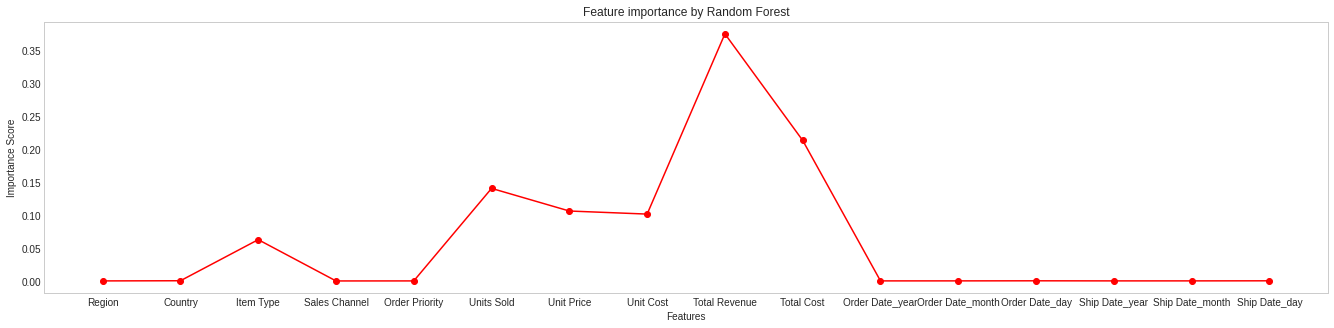

In [ ]:
plt.figure(figsize=(23, 5))
plt.plot(rf_imp, 'r-o')

default_x_ticks = range(len(rf_imp))
plt.xticks(default_x_ticks,col)
plt.title('Feature importance by Random Forest')
plt.xlabel("Features")
plt.ylabel("Importance Score")

ax = plt.axes()
#ax.set_facecolor("black")
ax.grid(False)
plt.show()

##4. Gradient Boosting Regression

Boosting is an ensemble learning method that combines a set of weak learners into a strong learner to minimize training errors. In boosting, a random sample of data is selected, fitted with a model and then trained sequentially—that is, each model tries to compensate for the weaknesses of its predecessor.

### 4.1 Hyperparameter Tuning

1. **learning_rate**

  float, default=0.1.
  
  Learning rate shrinks the contribution of each tree by learning_rate.

2. **n_estimators**
  
  no of estimators that are needed

3. **max_features**
  
   The number of features to consider when looking for the best split:



In [ ]:
#what value of learning rate we choose
learning_rate = [float(x) for x in np.linspace(0.1, 1, 5)]

#no of estimators that are needed
n_estimators = [100, 90, 150, 200]

#how man features should be used in total
max_features = ['sqrt', 'log2']

# Create the grid
dt_grid = {
           'learning_rate' : learning_rate,
           'max_features' : max_features,
           'n_estimators': n_estimators}

In [ ]:
dt_grid

{'learning_rate': [0.1, 0.325, 0.55, 0.775, 1.0],
 'max_features': ['sqrt', 'log2'],
 'n_estimators': [100, 90, 150, 200]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Create the model to be tuned
dt_base = GradientBoostingRegressor(verbose=1)

# Create the random search SVR
dt_random = RandomizedSearchCV(estimator = dt_base, param_distributions = dt_grid, 
                               n_iter = 5, cv = 10,n_jobs = -1)


# Fit the random search model
dt_random.fit(x_train, y_train)

# View the best parameters from the random search
dt_random.best_params_

      Iter       Train Loss   Remaining Time 
         1 46274803077.6780            2.67s
         2 19058874919.1667            2.54s
         3  8531233061.2082            2.85s
         4  6533782954.1094            2.82s
         5  3753555273.0587            2.90s
         6  3014983596.7858            2.89s
         7  2786754580.2492            2.87s
         8  2385912593.2736            2.77s
         9  2181540373.0580            2.78s
        10  2002084741.9101            2.74s
        20  1182209239.9578            2.53s
        30   879246246.5554            2.31s
        40   652683087.5174            2.21s
        50   586258005.1062            2.00s
        60   503724598.7602            1.84s
        70   437898313.1469            1.62s
        80   364595817.3595            1.41s
        90   333095478.9242            1.22s
       100   292535220.8963            1.01s


{'learning_rate': 0.55, 'max_features': 'sqrt', 'n_estimators': 150}

In [ ]:
print(dt_random.best_score_)

0.9983457973888032


In [ ]:
clf = GradientBoostingRegressor(verbose=1,learning_rate = 0.325, max_features = 'log2', n_estimators = 200)
clf.fit(x_train,y_train)

      Iter       Train Loss   Remaining Time 
         1 37381691335.8117            4.66s
         2 24196906387.3406            4.27s
         3 15694167557.2390            4.15s
         4 11740343516.9603            4.04s
         5  8711368358.8329            4.05s
         6  7040364566.1963            4.20s
         7  5387256755.1976            4.02s
         8  4695656554.8463            3.87s
         9  3773194809.1071            3.92s
        10  3049764831.8674            3.98s
        20  1199194765.4614            3.55s
        30   596548071.5202            3.37s
        40   431276026.8816            3.11s
        50   364545435.6834            2.92s
        60   312729091.2112            2.75s
        70   264403452.8922            2.54s
        80   228277223.2220            2.33s
        90   195985115.3489            2.15s
       100   164771024.8725            1.95s
       200    73736702.5351            0.00s


GradientBoostingRegressor(learning_rate=0.325, max_features='log2',
                          n_estimators=200, verbose=1)

In [ ]:
acc = clf.score(x_train,y_train)

print("r2 score on train data", acc)

r2 score on train data 0.9989116896743137


In [ ]:
pred_gb = clf.predict(x_test)
r2_score(y_test, pred_gb)

0.9986927131733399

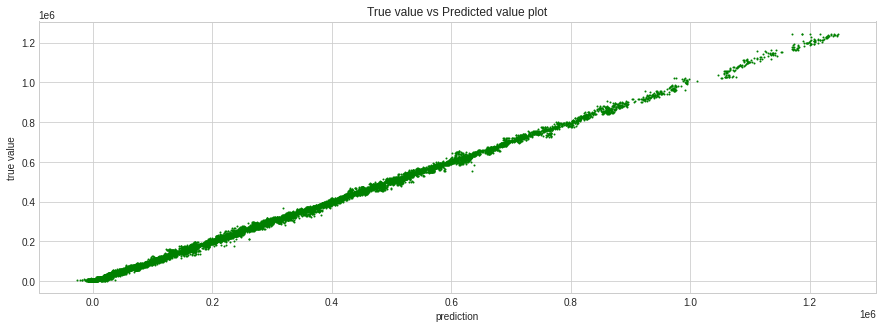

In [ ]:
plt.figure(figsize=(15, 5))
plt.scatter(pred_gb,y_test, c ="green" , s = 1) 
plt.xlabel("prediction") 
plt.ylabel("true value") 

plt.title('True value vs Predicted value plot')
ax = plt.axes()
#ax.set_facecolor("black")

plt.show()

From the above graph we can see a distorted straight line.

### 4.2 Feature Importance

In [ ]:
gb_imp = clf.feature_importances_
print(gb_imp)

[3.32972390e-05 2.23569650e-04 4.78810821e-02 9.68313156e-08
 5.89101817e-06 7.04758569e-02 9.65814394e-02 5.67050566e-02
 6.30883048e-01 9.70311599e-02 1.24935649e-06 1.20590282e-05
 5.50047808e-05 2.73798918e-06 9.04060840e-05 1.80450119e-05]


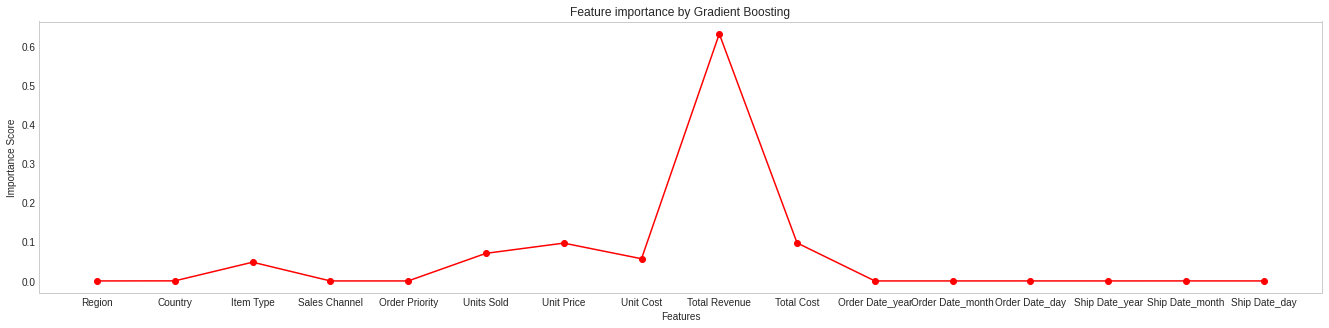

In [ ]:
plt.figure(figsize=(23, 5))
plt.plot(gb_imp, 'r-o')

default_x_ticks = range(len(gb_imp))
plt.xticks(default_x_ticks,col)
plt.title('Feature importance by Gradient Boosting')
plt.xlabel("Features")
plt.ylabel("Importance Score")

ax = plt.axes()
#ax.set_facecolor("black")
ax.grid(False)
plt.show()

##5. Ridge Regression


This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm. 

### 5.1 Hyperparameter Tuning 

In [ ]:
from sklearn.linear_model import Ridge
alpha = [float(x) for x in np.linspace(1.5, 2, 5)] 

r2_score_array=[]
for i in alpha:
    clf = Ridge(alpha=i)
    clf.fit(x_train, y_train)
    r2_score_array.append(clf.score(x_train,y_train))
    predict_y = clf.predict(x_test)
    print('For values of alpha = ', i, "The r2score on test data is:",r2_score(y_test, predict_y))

For values of alpha =  1.5 The r2score on test data is: 0.9987896280760963
For values of alpha =  1.625 The r2score on test data is: 0.998621786635691
For values of alpha =  1.75 The r2score on test data is: 0.9984483023497439
For values of alpha =  1.875 The r2score on test data is: 0.9982698064281301
For values of alpha =  2.0 The r2score on test data is: 0.998086865426048


In [ ]:
best_alpha = np.argmax(r2_score_array)
print(alpha[best_alpha])

1.5


In [ ]:
clf = Ridge(alpha = 0.5)
reg = clf.fit(x_train, y_train)
pred = reg.predict(x_test)
acc = reg.score(x_train,y_train)
print("r2_score on train data",acc)

r2_score on train data 0.999825050679509


In [ ]:
print("r2_score on test data", r2_score(y_test, pred))

r2_score on test data 0.9998247233920747


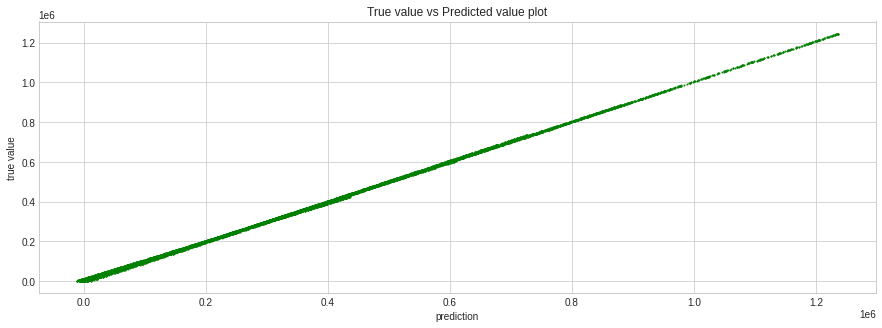

In [ ]:
plt.figure(figsize=(15, 5))
plt.scatter(pred,y_test, c ="green" , s = 1) 
plt.xlabel("prediction") 
plt.ylabel("true value") 

plt.title('True value vs Predicted value plot')
ax = plt.axes()
#ax.set_facecolor("black")

plt.show()

We can see a straight line but its distorted at the ends of line 

### 5.2 Feature Importance

In [ ]:
importance = reg.coef_

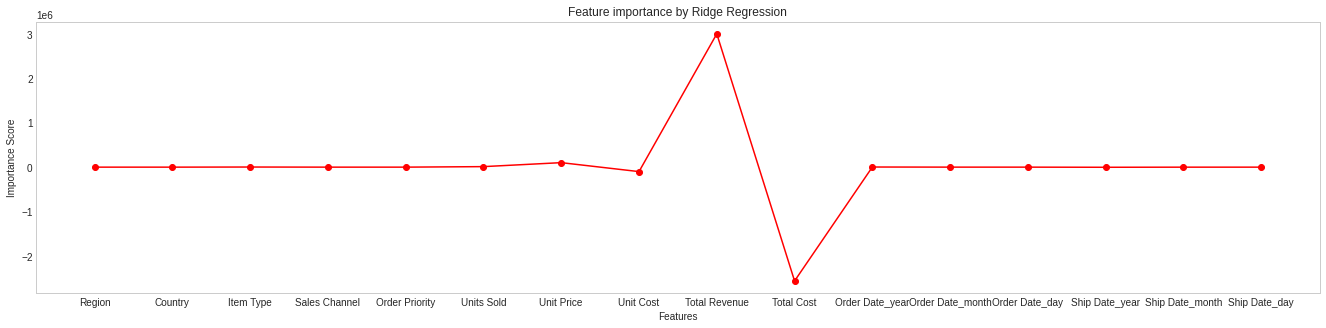

In [ ]:
plt.figure(figsize=(23, 5))
plt.plot(importance, 'r-o')

default_x_ticks = range(len(importance))
plt.xticks(default_x_ticks,col)
plt.title('Feature importance by Ridge Regression')
plt.xlabel("Features")
plt.ylabel("Importance Score")

ax = plt.axes()
#ax.set_facecolor("black")
ax.grid(False)
plt.show()

## 6. Decision Trees

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.

### 6.1 Hyperparameter Tuning 

1. **max_depth** - 
   int, default=None. 
   The maximum depth of the tree.

2. **max_features** - 
   The number of features to consider when looking for the best split.

3. **min_samples_split** - 
   The minimum number of samples required to split an internal node
  
4. **min_impurity_decrease** - float, default=0.0 . 
A node will be split if this split induces a decrease of the impurity greater than or equal to this value.


In [ ]:
#depth of treeS
max_depth = [int(x) for x in np.linspace(5,55,11)]
max_depth.append(None)

#maximum features to consider at every split
max_features = ['auto', 'sqrt', 'log2', None]
                 

# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(50, 100, 10)]

# Minimum decrease in impurity required for split to happen
min_impurity_decrease = [0.0, 0.05, 0.1]


# Create the grid
dt_grid = {'max_depth': max_depth,
           'max_features': max_features,
           'min_samples_split': min_samples_split,
           'min_impurity_decrease': min_impurity_decrease,
          }

In [ ]:
dt_grid

{'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, None],
 'max_features': ['auto', 'sqrt', 'log2', None],
 'min_impurity_decrease': [0.0, 0.05, 0.1],
 'min_samples_split': [50, 55, 61, 66, 72, 77, 83, 88, 94, 100]}

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

# Create the model to be tuned
dt_base = DecisionTreeRegressor()

# Create the random search Random Forest
dt_random = RandomizedSearchCV(estimator = dt_base, param_distributions = dt_grid, 
                               n_iter = 200, cv = 3, verbose = 2, random_state = 42, 
                               n_jobs = -1)

# Fit the random search model
dt_random.fit(x_train, y_train)

# View the best parameters from the random search
dt_random.best_params_

Fitting 3 folds for each of 200 candidates, totalling 600 fits


{'max_depth': 20,
 'max_features': 'auto',
 'min_impurity_decrease': 0.05,
 'min_samples_split': 50}

In [ ]:
dt = DecisionTreeRegressor(max_depth =  15,max_features = 'auto', min_impurity_decrease = 0.0, min_samples_split = 50)
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=15, max_features='auto', min_samples_split=50)

In [ ]:
print('r2 score on train data', dt.score(x_train,y_train))

r2 score on train data 0.9998877435990924


In [ ]:
pred_dt = dt.predict(x_test)
print('r2 score on test data', r2_score(pred_dt,y_test))

r2 score on test data 0.9998731512723882


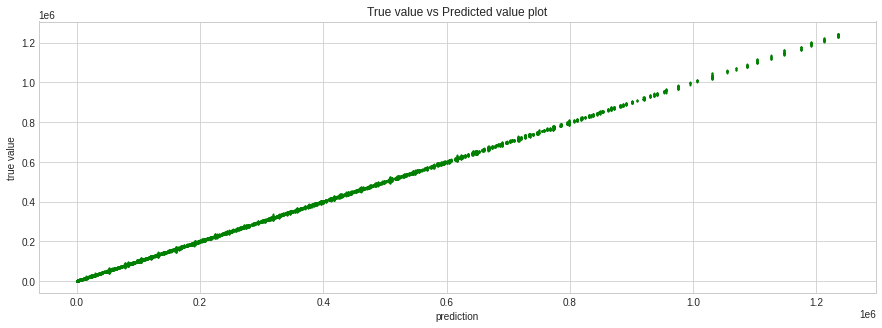

In [ ]:
plt.figure(figsize=(15, 5))
plt.scatter(pred_dt,y_test, c ="green" , s = 1) 
plt.xlabel("prediction") 
plt.ylabel("true value") 

plt.title('True value vs Predicted value plot')
ax = plt.axes()
#ax.set_facecolor("black")

plt.show()

We can see almost perfect straight line between true_value and predicted_values.

Decision Trees are performing very well

### 6.2 Feature Importance

In [ ]:
dt_imp = dt.feature_importances_
print(dt_imp)

[0.         0.         0.01242987 0.         0.         0.02178319
 0.00482541 0.08589696 0.8590346  0.01602997 0.         0.
 0.         0.         0.         0.        ]


In [ ]:
col = x_train.columns

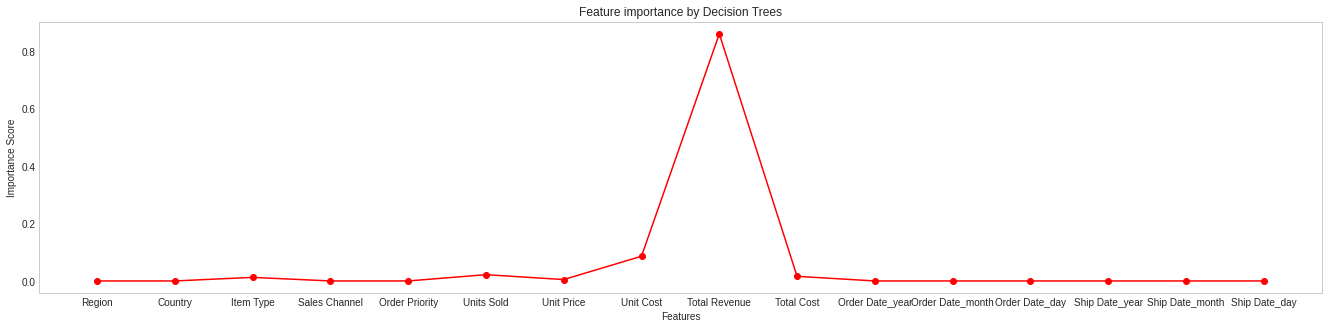

In [ ]:
plt.figure(figsize=(23, 5))
plt.plot(dt_imp, 'r-o')

default_x_ticks = range(len(dt_imp))
plt.xticks(default_x_ticks,col)
plt.title('Feature importance by Decision Trees')
plt.xlabel("Features")
plt.ylabel("Importance Score")

ax = plt.axes()
#ax.set_facecolor("black")
ax.grid(False)
plt.show()

## Stacking Regression Models

Stacking or Stacked Generalization is an ensemble machine learning algorithm.

It uses a meta-learning algorithm to learn how to best combine the predictions from two or more base machine learning algorithms.

The benefit of stacking is that it can harness the capabilities of a range of well-performing models on a classification or regression task and make predictions that have better performance than any single model in the ensemble.

In [ ]:
from sklearn.ensemble import StackingRegressor
estimators = [('svr',svr),('knr', knr),('dt',dt)]

stack = StackingRegressor(estimators = estimators, final_estimator = clf)

In [ ]:
stack.fit(x_train,y_train)

StackingRegressor(estimators=[('svr',
                               SVR(C=3.0, degree=6, epsilon=0.5,
                                   kernel='poly')),
                              ('knr',
                               KNeighborsRegressor(leaf_size=40, n_neighbors=7,
                                                   p=1, weights='distance')),
                              ('dt',
                               DecisionTreeRegressor(max_depth=15,
                                                     max_features='auto',
                                                     min_samples_split=50))],
                  final_estimator=Ridge(alpha=0.5))

In [ ]:
pred_stack = stack.predict(x_test)
r2_score(pred_stack,y_test)

0.999872984611879

In [ ]:
stack.score(x_train,y_train)

0.9998883867825368

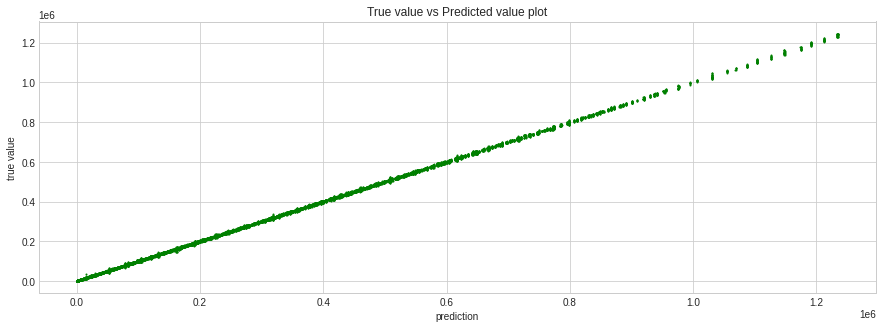

In [ ]:
plt.figure(figsize=(15, 5))
plt.scatter(pred_stack,y_test, c ="green" , s = 1) 
plt.xlabel("prediction") 
plt.ylabel("true value") 

plt.title('True value vs Predicted value plot')
ax = plt.axes()
#ax.set_facecolor("black")

plt.show()

We can see almost straight line in the above graph. Therefore, stacking also performs good. 

## Voting Ensemble

A voting ensemble works by combining the predictions from multiple models. It can be used for classification or regression.

In the case of regression, this involves calculating the average of the predictions from the models. 

In the case of classification, the predictions for each label are summed and the label with the majority vote is predicted.

In [ ]:
from sklearn.ensemble import VotingRegressor
VR = VotingRegressor([('lr', clf), ('svr', svr),('knn',knr),('dt',dt)], n_jobs = -1)

In [ ]:
VR.fit(x_train,y_train)
VR.score(x_train,y_train)

0.9732322944647609

In [ ]:
pred_vr = VR.predict(x_test)
r2_score(pred_vr,y_test)

0.9508427235081537

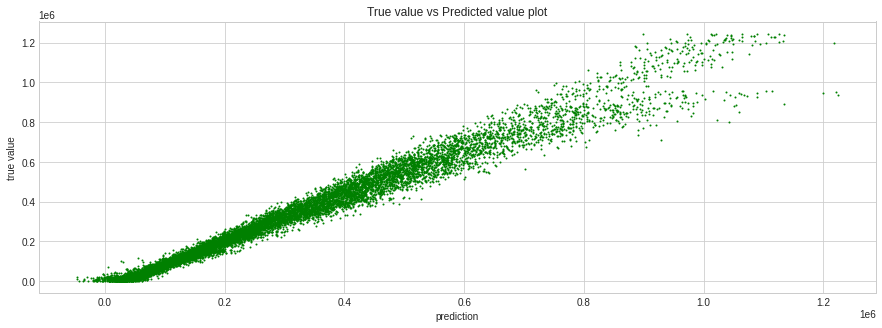

In [ ]:
plt.figure(figsize=(15, 5))
plt.scatter(pred_vr,y_test, c ="green" , s = 1) 
plt.xlabel("prediction") 
plt.ylabel("true value") 

plt.title('True value vs Predicted value plot')
ax = plt.axes()
#ax.set_facecolor("black")


plt.show()

Voting Ensemble model doesn't perform that well on unseen data as evident from the above graph

### Save the best model for Deployment

The two best models which we got are 
1. Decision Trees Regressor
2. Stacking Regressor 

We choose to deploy Decision Tree Regressor model over Stacking Regressor because they are interpretable and less complex when compared with Stacking Regressor

In [ ]:
import pickle

In [ ]:
pickle.dump(dt,open('/content/drive/MyDrive/salesprofit_predictionmodel.pkl' , 'wb'))

In [ ]:
df.head(2)

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
0,0,Namibia,0,0,2,3604,668.27,502.54,2408445.08,1811154.16,597290.92,2015,8,31,2015,10,12
1,1,Iceland,11,1,3,8435,255.28,159.42,2153286.80,1344707.70,808579.10,2010,11,20,2011,1,9


We can see our saved model giving prediction when given feature values

In [ ]:
model = pickle.load(open('/content/drive/MyDrive/salesprofit_predictionmodel.pkl','rb'))

In [ ]:
print(model.predict([[0.166667,0.489130,0.363636,1.0,0.000000,0.594559,0.219641,0.162169,0.292737,0.199879,0.428571,0.181818,0.333333,0.428571,0.272727,0.066667]]))

[377723.88770833]


In [ ]:
print(model.predict([[0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0]]))

[231.10731707]
